In [497]:
from pykat import finesse        
from pykat.commands import *    
import numpy as np               
import matplotlib.pyplot as plt  

base = finesse.kat()
base.verbose = False

################ core optics#######################
Mich = """
l laser1 10 0 n1 # laser with P = 10 W

s modcav 1 n1 nmod1
mod eom 1e6 0.3 1 pm nmod1 nmod2
s s1 1 nmod2 n21

m1 PRMC 0.11 0 90 n21 n31
s s2 1 n31 n2
bs bs1 0.5 0.5 45 0 n2 n3 n4 n5 # 50:50 beam splitter
s Lx 1k n4 n8
s Ly 1k n3 n6
m1 ETMy 0.10 0 0 n6 n7
m1 ETMx 0.10 0 0 n8 n9
pd pow_out n5   #output port
pd prmc n2      #power reflected by interferometer
pd army n3      #power in arms y
pd armx n4      #power in arms x

"""

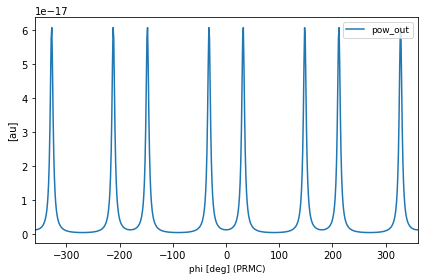

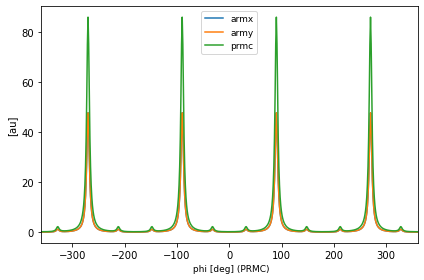

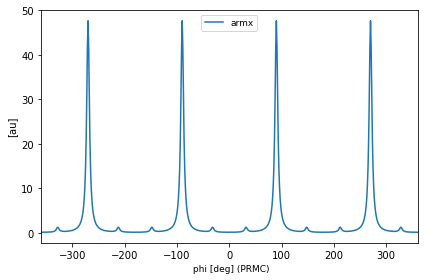

In [500]:
base.parse(Mich)
kat = base.deepcopy()
kat.parse(""" xaxis PRMC phi lin -360 360 600""")
out1=kat.run()
out1.plot(['pow_out'])
out1.plot(['prmc','army','armx'])
out1.plot(['armx'])